In [58]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.modeling import models, fitting
fitter = fitting.LinearLSQFitter()
from scipy.ndimage import median_filter


In [68]:
fname='../../Type1/OGLEJ050646.31-6843094/ADP.2021-02-01T09:58:47.729.fits'
mu_cent='../../Mu_Centauri/ADP.2016-09-21T11:56:32.916.fits'
fits.getheader(fname)

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2021-01-25T09:47:26' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
TELESCOP= 'ESO-VLT-U2'         / ESO Telescope Name                             
INSTRUME= 'UVES    '           / Instrument used.                               
RA      =            76.570448 / 05:06:16.9 RA (J2000) pointing                 
DEC     =            -68.67601 / -68:40:33.6 DEC (J2000) pointing               
EQUINOX =                2000. / Standard FK5                                   
RADECSYS= 'FK5     '        

In [60]:
fits.getheader(fname)

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2021-01-25T09:47:26' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
TELESCOP= 'ESO-VLT-U2'         / ESO Telescope Name                             
INSTRUME= 'UVES    '           / Instrument used.                               
RA      =            76.570448 / 05:06:16.9 RA (J2000) pointing                 
DEC     =            -68.67601 / -68:40:33.6 DEC (J2000) pointing               
EQUINOX =                2000. / Standard FK5                                   
RADECSYS= 'FK5     '        

In [61]:
fits.info(fname)

Filename: ../../Type1/OGLEJ050646.31-6843094/ADP.2021-02-01T09:58:47.729.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1012   ()      
  1  SPECTRUM      1 BinTableHDU     71   1R x 6C   [131425D, 131425E, 131425E, 131425E, 131425E, 131425E]   


In [62]:
#plt.figure(figsize=(20,20))
#plt.imshow(fits.getdata(fname3).T[600:800],norm='log',vmin=200,aspect=10)
xd = fits.getdata(fname)
cent=fits.getdata(mu_cent)
xd,cent

(FITS_rec([([4726.43473595, 4726.44902657, 4726.46331718, ..., 6834.98994102, 6835.00690525, 6835.02386948], [   0.      ,    0.      ,    0.      , ...,    0.      ,    0.      ,    0.      ], [  1.       ,   1.       ,   1.       , ...,   1.       ,   1.       ,   1.       ], [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00], [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,  0.       ], [0.        , 0.        , 0.        , ..., 0.03048105, 0.03048114, 0.03048123])],
          dtype=(numpy.record, [('WAVE', '>f8', (131425,)), ('FLUX_REDUCED', '>f4', (131425,)), ('ERR_REDUCED', '>f4', (131425,)), ('BGFLUX_REDUCED', '>f4', (131425,)), ('FLUX', '>f4', (131425,)), ('ERR', '>f4', (131425,))])),
 FITS_rec([([3527.36999997, 3527.39999997, 3527.42999997, ..., 9216.26987281, 9216.29987281, 9216.32987281], [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,  1.95430803e+00,  1.91651344e+00,  0.00000000e+00], [nan, n

In [63]:
xd['FLUX'], cent['FLUX']

(array([[0., 0., 0., ..., 0., 0., 0.]], shape=(1, 131425), dtype='>f4'),
 array([[0.       , 0.       , 0.       , ..., 1.954308 , 1.9165134,
         0.       ]], shape=(1, 189633), dtype='>f4'))

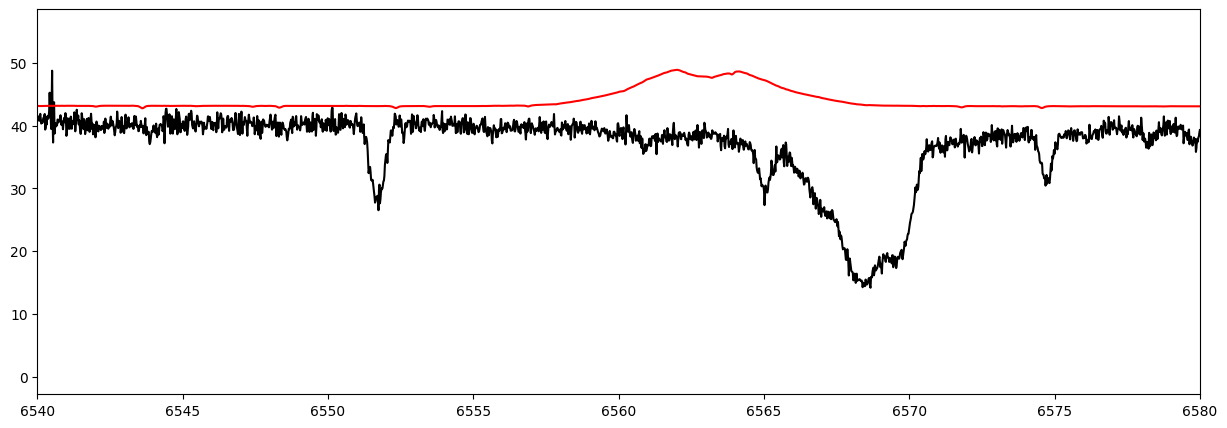

In [66]:
plt.figure(figsize=(15,5))
plt.plot(xd['WAVE'][0],xd['FLUX'][0], color='black')
plt.plot(cent['WAVE'][0],cent['FLUX'][0]+40, color='red')
plt.axvline(x=4861, color='b', linestyle='--')
#plt.ylim(-.1,1)
plt.xlim(6550,6580)#H-alpha
plt.margins(x=0)